# Week 4 — Analyse Oscar Award

## Dataset
### *the Oscar Award, 1927 - 2023

The Academy Awards, also officially and popularly known as the Oscars, are awards for artistic and technical merit in the film industry. Given annually by the Academy of Motion Picture Arts and Sciences (AMPAS), the awards are an international recognition of excellence in cinematic achievements as assessed by the Academy's voting membership. The various category winners are awarded a copy of a golden statuette, officially called the "Academy Award of Merit", although more commonly referred to by its nickname "Oscar". The statuette depicts a knight rendered in Art Deco style.

Content:
This file contains a scrape of The Academy Awards Database, recorded of past Academy Award winners and nominees between 1927 and 2023.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 200

In [14]:
oscar_df = pd.read_csv('the_oscar_award.csv')

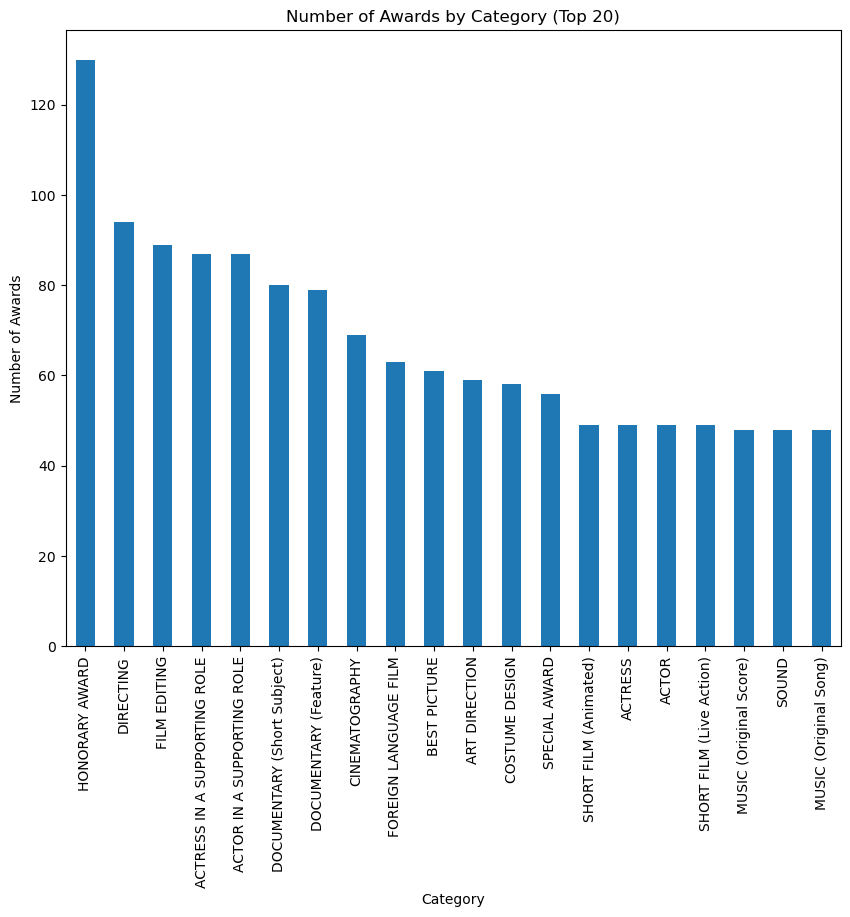

In [18]:
# 1: Award Trends Analysis

# Plot the number of awards won per category over the years
# Set the figure size to make it bigger
plt.figure(figsize=(10, 8))

# Select the top 20 categories to display
top_categories = oscar_df[oscar_df['winner'] == True]['category'].value_counts().head(20)
top_categories.plot(kind='bar')

# Rotate the labels on the x-axis to make them readable
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Number of Awards by Category (Top 20)')
plt.xlabel('Category')
plt.ylabel('Number of Awards')

# Show the plot
plt.show()



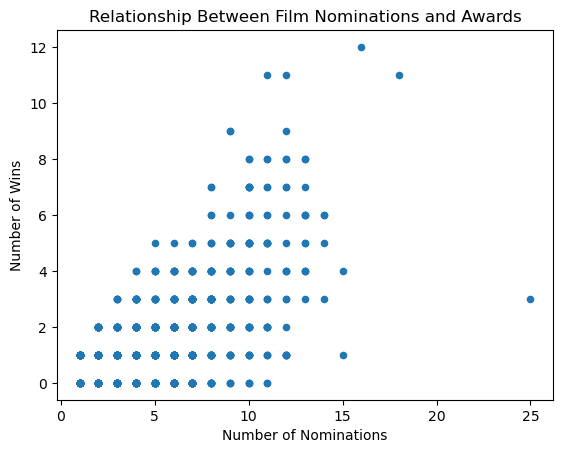

In [21]:
# 2: Relationship Between Films and Awards
# Calculate the number of nominations and awards for each film
nominations_count = oscar_df['film'].value_counts()
wins_count = oscar_df[oscar_df['winner']]['film'].value_counts()

# Create a new DataFrame to analyze the relationship between nominations and awards for films
film_awards = pd.DataFrame({
    'Nominations': nominations_count,
    'Wins': wins_count
}).fillna(0)  # Fill in zero for films without any award records

# Visualize the relationship between the number of nominations and awards for films
film_awards.plot(kind='scatter', x='Nominations', y='Wins')
plt.title('Relationship Between Film Nominations and Awards')
plt.xlabel('Number of Nominations')
plt.ylabel('Number of Wins')
plt.show()


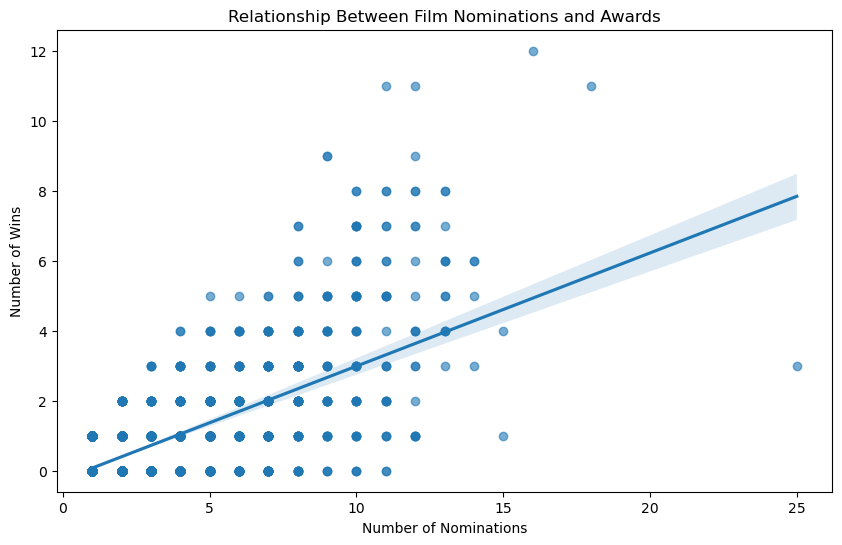

In [22]:
import seaborn as sns

# Plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Nominations', y='Wins', data=film_awards, scatter_kws={'alpha':0.6})
plt.title('Relationship Between Film Nominations and Awards')
plt.xlabel('Number of Nominations')
plt.ylabel('Number of Wins')
plt.show()

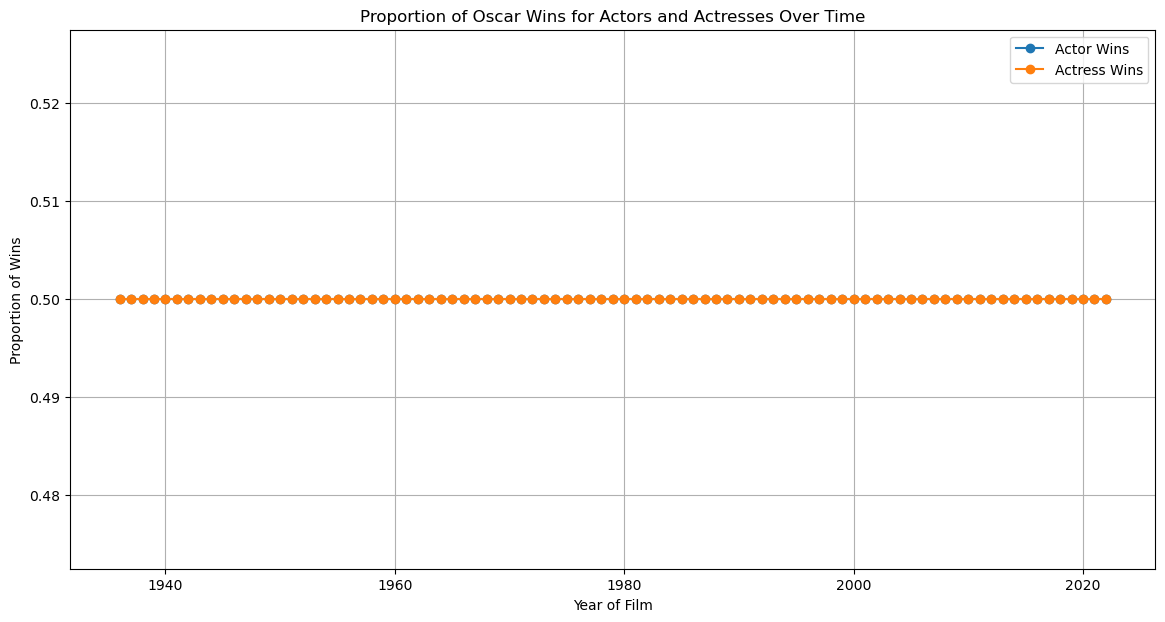

In [26]:
# Find out the proportion of Osacar Wins for Actors and Actresses Over Time.
# Filter out only the Actor and Actress categories
actor_categories = ['ACTOR IN A LEADING ROLE', 'ACTOR IN A SUPPORTING ROLE']
actress_categories = ['ACTRESS IN A LEADING ROLE', 'ACTRESS IN A SUPPORTING ROLE']

# Filter the DataFrame for winning actors and actresses
winning_actors = oscar_df[(oscar_df['category'].isin(actor_categories)) & (oscar_df['winner'] == True)]
winning_actresses = oscar_df[(oscar_df['category'].isin(actress_categories)) & (oscar_df['winner'] == True)]

# Group by year and count the wins
actor_wins_by_year = winning_actors.groupby('year_film').size()
actress_wins_by_year = winning_actresses.groupby('year_film').size()

# Combine the data into a single DataFrame
gender_wins_by_year = pd.DataFrame({
    'Actor Wins': actor_wins_by_year,
    'Actress Wins': actress_wins_by_year
})

# Normalize the data by converting the counts to proportions
gender_wins_by_year = gender_wins_by_year.div(gender_wins_by_year.sum(axis=1), axis=0)

# Plotting the data
import matplotlib.pyplot as plt

# Plot the proportion of actor wins over the years
gender_wins_by_year.plot(kind='line', figsize=(14, 7), marker='o')
plt.title('Proportion of Oscar Wins for Actors and Actresses Over Time')
plt.xlabel('Year of Film')
plt.ylabel('Proportion of Wins')
plt.legend()
plt.grid(True)
plt.show()

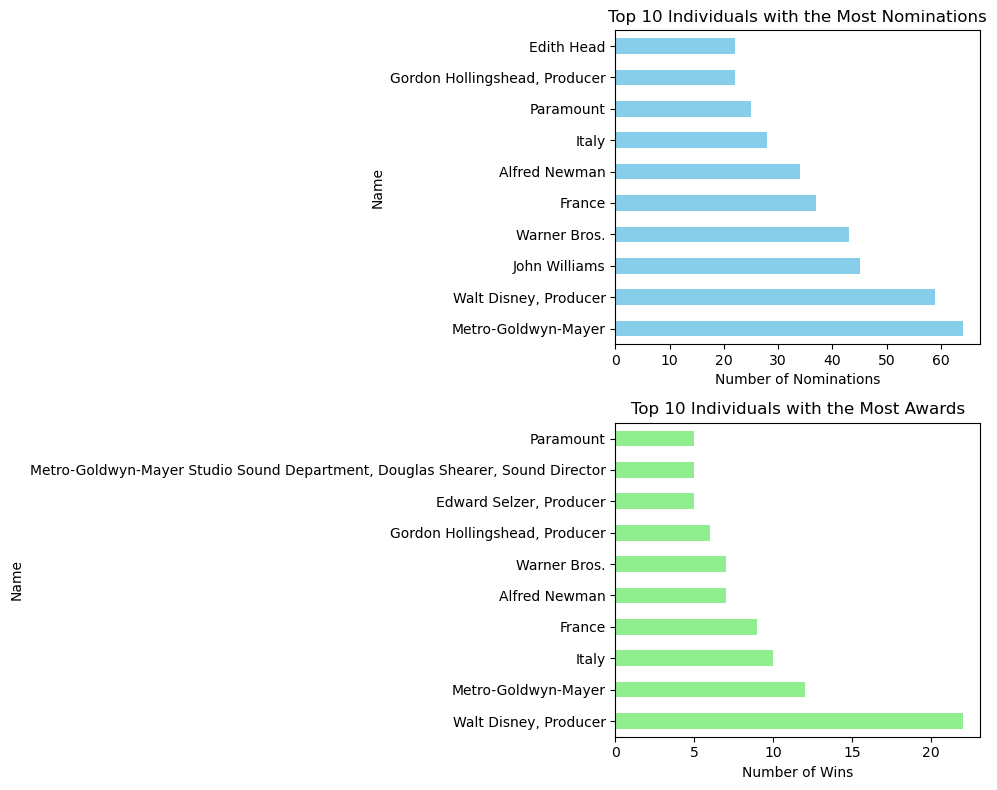

In [25]:
#4: Individual Achievements
# Calculate the number of nominations and awards for each individual
individual_nominations = oscar_df['name'].value_counts()
individual_wins = oscar_df[oscar_df['winner']]['name'].value_counts()

# Create a new DataFrame to analyze the relationship between nominations and awards for individuals
individual_awards = pd.DataFrame({
    'Nominations': individual_nominations,
    'Wins': individual_wins
}).fillna(0)  # Fill in zero for individuals without any award records

# Find the top 10 individuals with the most nominations and awards
top_nominated_individuals = individual_awards.sort_values(by='Nominations', ascending=False).head(10)
top_winning_individuals = individual_awards.sort_values(by='Wins', ascending=False).head(10)

# Visualize the top 10 individuals with the most nominations and awards
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
top_nominated_individuals['Nominations'].plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Individuals with the Most Nominations')
axes[0].set_xlabel('Number of Nominations')
axes[0].set_ylabel('Name')

top_winning_individuals['Wins'].plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Individuals with the Most Awards')
axes[1].set_xlabel('Number of Wins')
axes[1].set_ylabel('Name')

plt.tight_layout()
plt.show()